### Imports

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import glob
from oak_cli.utils.logging import logger
from oak_cli.evaluation.resources.main import ResourcesCSVKeys
from oak_cli.evaluation.common import get_csv_dir_for_scenario
from oak_cli.evaluation.types import EvaluationScenario
from oak_cli.evaluation.graph_utils import CPU_AND_MEMORY_KEYS, get_evaluation_run_duration_label, adjust_xticks

### Constants

In [39]:
csv_dir = get_csv_dir_for_scenario(EvaluationScenario.RESOURCES)

### Settings

In [40]:
USE_MINUTES = True

### Error Handing & Checking

In [41]:
if not csv_dir.exists():
    logger.error(f"{csv_dir} does not exist yet!")
    sys.exit(1)

### Common Graph Configuration

In [42]:
csv_files = glob.glob(f'{csv_dir}/*.csv')
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# NOTE: The CSV "time-since-start" values are very precise, thus they differ (slightly) between Evaluation-Runs.
# This difference leads to issues when trying to plot them in an aggregated way.
# To fix this we cast the floats to ints instead. I.e. we are looking at whole seconds - which is fine for this concrete use-case.
df[[ResourcesCSVKeys.TIME_SINCE_START.value]] = df[[ResourcesCSVKeys.TIME_SINCE_START.value]].astype(int)

df.set_index(ResourcesCSVKeys.TIME_SINCE_START.value, inplace=True)

if USE_MINUTES:
    df.index = df.index / 60

### Common Graph Styling


In [43]:
sns.set_style("whitegrid")

# Graphs Drawing

### CPU & Memory

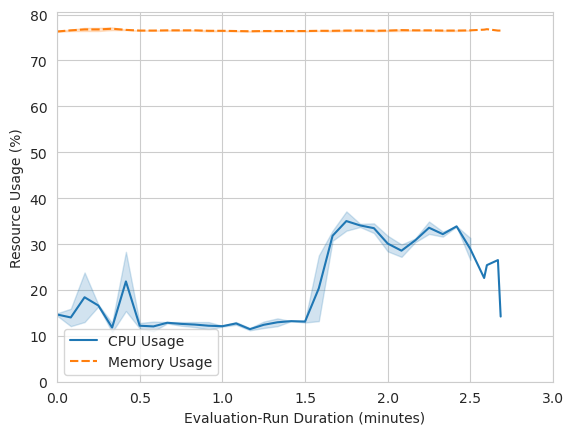

In [44]:
fig, ax = plt.subplots()

sns.lineplot(data=df[CPU_AND_MEMORY_KEYS])
# NOTE: The commented in code is a reference how to show one graph per evaluation-run.
# sns.lineplot(
#     data=df,
#     x=ResourcesCSVKeys.TIME_SINCE_START.value,
#     y=ResourcesCSVKeys.CPU_USAGE.value,
#     hue=ResourcesCSVKeys.EVALUATION_RUN_ID.value
#     )

plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Resource Usage (%)")
plt.xlim([0, max(df.index)])
plt.ylim(0)
adjust_xticks(ax)

plt.show()

### Disk Space Changes

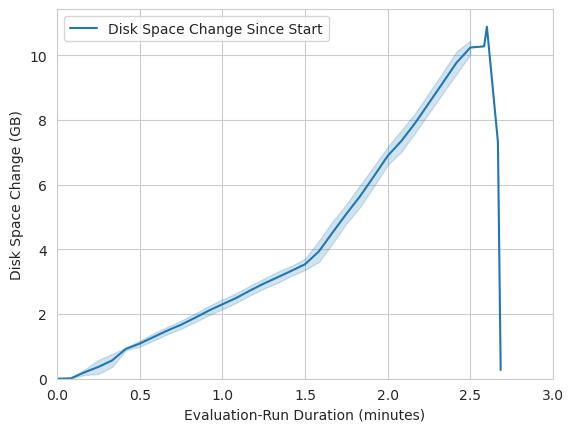

In [45]:
fig, ax = plt.subplots()

disk_space_key = ResourcesCSVKeys.DISK_SPACE_CHANGE_SINCE_START.value

# Note: Change MB to GB
df[[disk_space_key]] = df[[disk_space_key]] / 1024

sns.lineplot(data=df[[disk_space_key]])

plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Disk Space Change (GB)")
plt.xlim([0, max(df.index)])
plt.ylim(0)
adjust_xticks(ax)

plt.show()

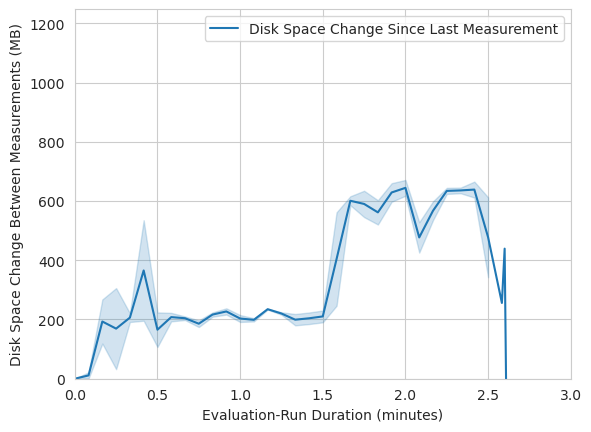

In [46]:
fig, ax = plt.subplots()

disk_space_key = ResourcesCSVKeys.DISK_SPACE_CHANGE_SINCE_LAST_MEASUREMENT.value

# Note: Change MB to GB
df[[disk_space_key]] = df[[disk_space_key]]

sns.lineplot(data=df[[disk_space_key]])

plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Disk Space Change Between Measurements (MB)")
plt.xlim([0, max(df.index)])
plt.ylim(0)
adjust_xticks(ax)

plt.show()

### Network

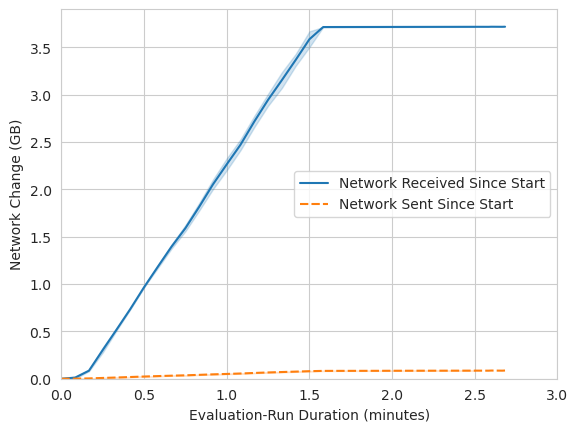

In [47]:
fig, ax = plt.subplots()

NETWORK_COMPARED_TO_START_KEYS = [ResourcesCSVKeys.NETWORK_RECEIVED_SINCE_START.value, ResourcesCSVKeys.NETWORK_SENT_SINCE_START.value]

sns.lineplot(data=df[NETWORK_COMPARED_TO_START_KEYS] / 1024)

plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Network Change (GB)")
plt.xlim([0, max(df.index)])
plt.ylim(0)
adjust_xticks(ax)

plt.show()

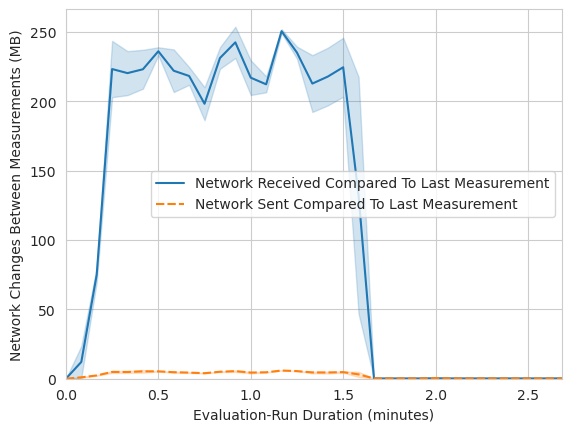

In [48]:
NETWORK_COMPARED_TO_LAST_MEASUREMENT_KEYS = [ResourcesCSVKeys.NETWORK_RECEIVED_COMPARED_TO_LAST_MEASUREMENT.value, ResourcesCSVKeys.NETWORK_SENT_COMPARED_TO_LAST_MEASUREMENT.value]

sns.lineplot(data=df[NETWORK_COMPARED_TO_LAST_MEASUREMENT_KEYS])
plt.xlabel(get_evaluation_run_duration_label())
plt.ylabel("Network Changes Between Measurements (MB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()